In [ ]:
C:\Users\admin\Desktop\DEcision Random Ensembled\Random forest excelR\Company_Data.csv

In [1]:
import pandas as pd

from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pandas as pd
from sklearn.ensemble import RandomForestClassifier


C:\Users\admin\anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [2]:
pd.set_option("display.max_rows",None)

In [3]:
data = pd.read_csv("C://Users//admin//Desktop//DEcision Random Ensembled//Random forest excelR//Company_Data.csv")
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
5,10.81,124,113,13,501,72,Bad,78,16,No,Yes
6,6.63,115,105,0,45,108,Medium,71,15,Yes,No
7,11.85,136,81,15,425,120,Good,67,10,Yes,Yes
8,6.54,132,110,0,108,124,Medium,76,10,No,No
9,4.69,132,113,0,131,124,Medium,76,17,No,Yes


In [4]:
data.isnull().sum() 


Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [5]:
data["Sales"].value_counts()

7.80     4
6.67     3
8.77     3
9.32     3
5.87     3
6.53     3
6.88     3
6.20     3
4.10     3
5.58     2
6.52     2
10.26    2
7.52     2
4.90     2
5.30     2
11.19    2
7.22     2
7.56     2
4.81     2
8.67     2
5.36     2
6.97     2
8.47     2
4.42     2
7.81     2
4.69     2
12.57    2
6.03     2
5.94     2
8.19     2
8.68     2
6.41     2
9.16     2
9.01     2
7.71     2
5.68     2
8.01     2
4.53     2
5.32     2
8.55     2
11.70    2
4.95     2
3.47     2
7.41     2
11.27    2
3.90     2
12.49    2
7.49     2
7.78     2
5.08     2
6.71     2
5.17     2
11.48    2
6.50     2
10.14    1
7.95     1
5.97     1
7.67     1
7.32     1
4.74     1
5.05     1
10.64    1
9.53     1
8.32     1
8.41     1
4.21     1
8.87     1
6.90     1
0.91     1
8.33     1
5.28     1
10.81    1
7.91     1
6.38     1
8.79     1
4.78     1
10.61    1
4.96     1
8.39     1
8.64     1
8.23     1
7.82     1
5.21     1
10.27    1
6.11     1
5.74     1
4.99     1
5.83     1
9.54     1
10.49    1
11.54    1

In [6]:
bins = [0,11,20]
labels = ['A','B']
data['Sales1'] = pd.cut(data['Sales'], bins=bins, labels=labels)


In [7]:
data1 = data.drop(columns = 'Sales')
data1

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales1
0,138,73,11,276,120,Bad,42,17,Yes,Yes,A
1,111,48,16,260,83,Good,65,10,Yes,Yes,B
2,113,35,10,269,80,Medium,59,12,Yes,Yes,A
3,117,100,4,466,97,Medium,55,14,Yes,Yes,A
4,141,64,3,340,128,Bad,38,13,Yes,No,A
5,124,113,13,501,72,Bad,78,16,No,Yes,A
6,115,105,0,45,108,Medium,71,15,Yes,No,A
7,136,81,15,425,120,Good,67,10,Yes,Yes,B
8,132,110,0,108,124,Medium,76,10,No,No,A
9,132,113,0,131,124,Medium,76,17,No,Yes,A


In [8]:
data1["ShelveLoc"].value_counts()

Medium    219
Bad        96
Good       85
Name: ShelveLoc, dtype: int64

In [9]:
order_Label = {"Medium":2,"Bad":1,"Good":3}

In [10]:
data1["ShelveLoc"] = data1["ShelveLoc"].map(order_Label)

In [11]:
data1

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales1
0,138,73,11,276,120,1,42,17,Yes,Yes,A
1,111,48,16,260,83,3,65,10,Yes,Yes,B
2,113,35,10,269,80,2,59,12,Yes,Yes,A
3,117,100,4,466,97,2,55,14,Yes,Yes,A
4,141,64,3,340,128,1,38,13,Yes,No,A
5,124,113,13,501,72,1,78,16,No,Yes,A
6,115,105,0,45,108,2,71,15,Yes,No,A
7,136,81,15,425,120,3,67,10,Yes,Yes,B
8,132,110,0,108,124,2,76,10,No,No,A
9,132,113,0,131,124,2,76,17,No,Yes,A


In [12]:
new_data=data1
data2=pd.get_dummies(new_data['Urban'])
data2

,No,Yes
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
5,1,0
6,0,1
7,0,1
8,1,0
9,1,0


In [13]:
data3=pd.get_dummies(new_data['US'])
data3

,No,Yes
0,0,1
1,0,1
2,0,1
3,0,1
4,1,0
5,0,1
6,1,0
7,0,1
8,1,0
9,0,1


In [14]:
new_data1=new_data.drop(columns = ['Urban','US'])
new_data1

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Sales1
0,138,73,11,276,120,1,42,17,A
1,111,48,16,260,83,3,65,10,B
2,113,35,10,269,80,2,59,12,A
3,117,100,4,466,97,2,55,14,A
4,141,64,3,340,128,1,38,13,A
5,124,113,13,501,72,1,78,16,A
6,115,105,0,45,108,2,71,15,A
7,136,81,15,425,120,3,67,10,B
8,132,110,0,108,124,2,76,10,A
9,132,113,0,131,124,2,76,17,A


In [15]:
new_data1['Urban_No']=data2['No'].to_list()
new_data1['Urban_Yes']=data2['Yes'].to_list()
new_data1['US_No']=data3['No'].to_list()
new_data1['US_Yes']=data3['Yes'].to_list()
new_data1

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Sales1,Urban_No,Urban_Yes,US_No,US_Yes
0,138,73,11,276,120,1,42,17,A,0,1,0,1
1,111,48,16,260,83,3,65,10,B,0,1,0,1
2,113,35,10,269,80,2,59,12,A,0,1,0,1
3,117,100,4,466,97,2,55,14,A,0,1,0,1
4,141,64,3,340,128,1,38,13,A,0,1,1,0
5,124,113,13,501,72,1,78,16,A,1,0,0,1
6,115,105,0,45,108,2,71,15,A,0,1,1,0
7,136,81,15,425,120,3,67,10,B,0,1,0,1
8,132,110,0,108,124,2,76,10,A,1,0,1,0
9,132,113,0,131,124,2,76,17,A,1,0,0,1


In [16]:
new_data1.isnull().sum() 

CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Sales1         1
Urban_No       0
Urban_Yes      0
US_No          0
US_Yes         0
dtype: int64

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

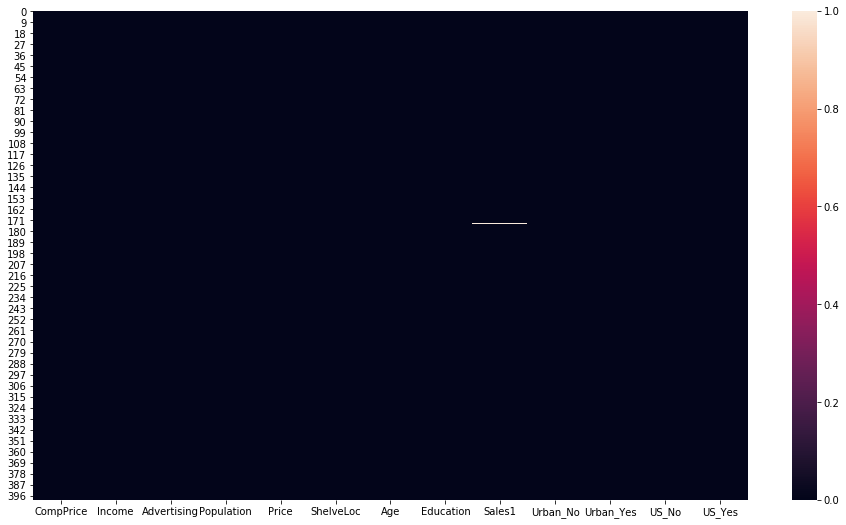

In [18]:
plt.figure(figsize=(16,9))
sns.heatmap(new_data1.isnull())

In [19]:
new_data2 = new_data1.dropna()


In [20]:
new_data2.isnull().sum()
 

CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Sales1         0
Urban_No       0
Urban_Yes      0
US_No          0
US_Yes         0
dtype: int64

In [21]:
new_data2.dtypes

CompPrice         int64
Income            int64
Advertising       int64
Population        int64
Price             int64
ShelveLoc         int64
Age               int64
Education         int64
Sales1         category
Urban_No          int64
Urban_Yes         int64
US_No             int64
US_Yes            int64
dtype: object

In [22]:
X = new_data2.drop(columns = 'Sales1')
y = new_data2['Sales1']

In [23]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.30, random_state= 355)

In [24]:
rand_clf = RandomForestClassifier(random_state=6)

In [25]:
rand_clf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=6, verbose=0,
                       warm_start=False)

In [26]:
rand_clf.score(x_test,y_test)

0.8916666666666667

In [27]:
scalar = StandardScaler()

x_transform = scalar.fit_transform(X)

In [28]:
x_train,x_test,y_train,y_test = train_test_split(x_transform,y,test_size = 0.30, random_state= 355)

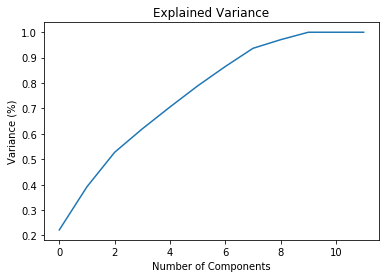

In [29]:
from sklearn.decomposition import PCA
import numpy as np
pca = PCA()
principalComponents = pca.fit_transform(x_transform)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
plt.show()

In [30]:
pca = PCA(n_components=9)
new_data3 = pca.fit_transform(x_transform)

principal_x = pd.DataFrame(new_data3,columns=['PC-1','PC-2','PC-3','PC-4','PC-5','PC-6','PC-7','PC-8','PC-9'])
principal_x

,PC-1,PC-2,PC-3,PC-4,PC-5,PC-6,PC-7,PC-8,PC-9
0,1.245763,-0.976082,-0.462790,0.072726,1.462119,-1.417103,-0.082424,0.019430,-0.491416
1,1.696765,-0.082706,1.678459,0.165947,-2.150384,0.825587,0.431282,-0.661287,-0.296107
2,1.077932,-0.290627,1.638873,0.179569,-1.171964,-0.407493,0.016122,-1.215358,-0.484427
3,0.966289,-0.394428,1.378683,-0.680358,0.254519,0.160135,0.182271,0.934476,-0.441254
4,-1.627509,-1.488995,-0.782205,-1.612080,0.717104,-0.637740,-0.464630,-0.278196,-0.323404
5,1.061159,2.631945,1.663451,-0.051548,1.453839,-0.460355,-1.733505,1.462973,-1.474624
6,-2.105089,-1.199800,1.095546,1.260224,0.700610,1.177568,-0.054479,0.661926,0.394641
7,2.031244,-0.533165,-0.056798,-0.781494,-1.592189,1.415361,-0.329931,0.811414,-0.516574
8,-2.270844,1.456707,-0.494792,0.150058,0.587701,2.681733,-1.378925,0.128709,0.049827
9,-0.014074,1.845021,-0.677553,1.979364,1.472541,1.066047,-0.816679,1.006243,-0.138288


In [31]:
x_train,x_test,y_train,y_test = train_test_split(principal_x,y,test_size = 0.30, random_state= 355)
rand_clf = RandomForestClassifier(random_state=6)
rand_clf.fit(x_train,y_train)
rand_clf.score(x_test,y_test)

0.8916666666666667

In [32]:
grid_param = {
    "n_estimators" : [10,20,30],
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,10,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'max_features' : ['auto','log2']
}

In [33]:
grid_search = GridSearchCV(estimator=rand_clf,param_grid=grid_param,cv=5,n_jobs =-1,verbose = 3)

In [34]:
grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 6912 candidates, totalling 34560 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done 488 tasks      | elapsed:   17.8s
[Parallel(n_jobs=-1)]: Done 936 tasks      | elapsed:   31.1s
[Parallel(n_jobs=-1)]: Done 1512 tasks      | elapsed:   46.8s
[Parallel(n_jobs=-1)]: Done 2216 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 3048 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 4008 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 5096 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 6312 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 7656 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 9128 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 10728 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 12456 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 14312 tasks     

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=6,
                                   

In [35]:
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 20}

In [36]:
rand_clf = RandomForestClassifier(criterion= 'entropy',
 max_depth = 5,
 max_features = 'auto',
 min_samples_leaf = 1,
 min_samples_split= 6,
 n_estimators = 20,random_state=6)

In [37]:
rand_clf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=6, verbose=0,
                       warm_start=False)

In [38]:
rand_clf.score(x_test,y_test)

0.9

In [39]:
grid_param = {
    "n_estimators" : [90,100,115],
    'criterion': ['gini', 'entropy'],
    'min_samples_leaf' : [1,2,3,4,5],
    'min_samples_split': [4,5,6,7,8],
    'max_features' : ['auto','log2']
}

In [40]:
grid_search = GridSearchCV(estimator=rand_clf,param_grid=grid_param,cv=5,n_jobs =-1,verbose = 3)

In [41]:
grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   15.7s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:   37.2s
[Parallel(n_jobs=-1)]: Done 504 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 1144 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:  3.5min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='entropy', max_depth=5,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=6,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=20, n_jobs=None,
                                              oob_score=False, random_state=6,
                                    

In [42]:
grid_search.best_params_

{'criterion': 'entropy',
 'max_features': 'auto',
 'min_samples_leaf': 4,
 'min_samples_split': 4,
 'n_estimators': 90}

In [49]:
rand_clf = RandomForestClassifier(criterion= 'entropy',
 max_features = 'auto',
 min_samples_leaf = 4,
 min_samples_split= 4,
 n_estimators = 90,random_state=6)

In [50]:
rand_clf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=90,
                       n_jobs=None, oob_score=False, random_state=6, verbose=0,
                       warm_start=False)

In [51]:
rand_clf.score(x_test,y_test)

0.8833333333333333